In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
%%bash

head -19 ../avida_files/clock/data/average.dat
head -19 ../avida_files/clock/data/count.dat
head -19 ../avida_files/clock/data/dominant.dat
head -7 ../avida_files/clock/data/resource.dat
head -7 ../avida_files/clock/data/time.dat
head -11 ../avida_files/clock/data/tasks.dat
head -11 ../avida_files/clock/data/tasks_exe.dat
head -5 ../avida_files/clock/data/sense.dat
head -5 ../avida_files/clock/data/sense_exe.dat
head -6 ../avida_files/clock/data/sleep.dat
head -33 ../avida_files/clock/data/instruction.dat
head -15 ../avida_files/clock/data/reactions.dat

# Avida Average Data
# Fri Jan 13 15:00:14 2017
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: (deprecated) Size
#  7: Copied Size
#  8: Executed Size
#  9: (deprecated) Abundance
# 10: Proportion of organisms that gave birth in this update
# 11: Proportion of Breed True Organisms
# 12: (deprecated) Genotype Depth
# 13: Generation
# 14: Neutral Metric
# 15: Lineage Label
# 16: True Replication Rate (based on births/update, time-averaged)

# Avida count data
# Fri Jan 13 15:00:14 2017
#  1: update
#  2: number of insts executed this update
#  3: number of organisms
#  4: (deprecated) number of different genotypes
#  5: (deprecated) number of different threshold genotypes
#  6: (deprecated) number of different species
#  7: (deprecated) number of different threshold species
#  8: (deprecated) number of different lineages
#  9: number of births in this update
# 10: number of deaths in this update
# 11: number of breed true
# 12: number of breed true or

In [57]:
columns = ['update','day','night','']

df_res = pd.read_table('../avida_files/clock/data/resource.dat',
                           delimiter=' ', skiprows=8, header=None)

df_res.columns = columns
df_res = df_res.dropna(axis=1)

df_res.tail()

,update,day,night
4996,49960,100,0
4997,49970,100,0
4998,49980,100,0
4999,49990,100,0
5000,50000,100,0


(-10, 110)

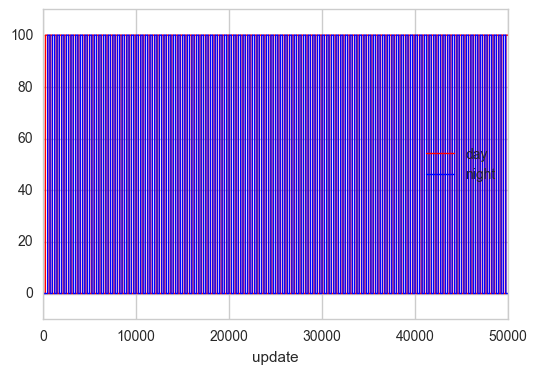

In [58]:
df_res.plot('update',['day','night'], kind='line', ls='-', lw=1,
            color=['r','b'])

#plt.xlim(9000,10000)
plt.ylim(-10,110)

In [59]:
columns = ['update','echo','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_tasks = pd.read_table('../avida_files/clock/data/tasks.dat',
                         delimiter=' ', skiprows=15, header=None)

df_tasks.columns = columns
df_tasks = df_tasks.dropna(axis=1)

df_tasks.tail()

,update,echo,not,nand,and,ornot,or,andnot,nor,xor,equals
496,49600,3458,266,2897,2,262,0,2,0,0,0
497,49700,3460,270,2899,2,264,0,2,0,0,0
498,49800,3465,275,2904,2,255,0,2,0,0,0
499,49900,3471,277,2909,4,264,0,2,0,0,0
500,50000,3464,279,2903,4,266,0,2,0,0,0


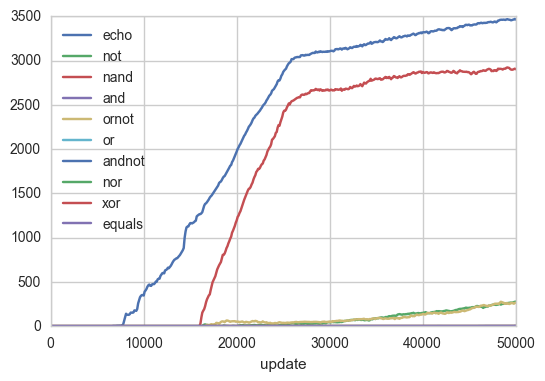

In [60]:
df_tasks.plot('update', ['echo','not','nand','and','ornot','or','andnot','nor','xor','equals'])
#plt.xlim(100000,150000)
#plt.ylim(3250,3750)

In [61]:
columns = ['update','echo','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_tasks_exe = pd.read_table('../avida_files/clock/data/tasks_exe.dat',
                         delimiter=' ', skiprows=15, header=None)

df_tasks_exe.columns = columns
df_tasks_exe = df_tasks_exe.dropna(axis=1)

df_tasks_exe.tail()

,update,echo,not,nand,and,ornot,or,andnot,nor,xor,equals
495,49600,364218,14840,110303,108,14115,0,2,0,0,0
496,49700,365925,15021,110680,108,14190,0,2,0,0,0
497,49800,369256,15239,111143,108,13346,0,2,0,0,0
498,49900,372174,15625,111596,216,13978,0,2,0,0,0
499,50000,372129,15879,111392,216,14113,0,2,0,0,0


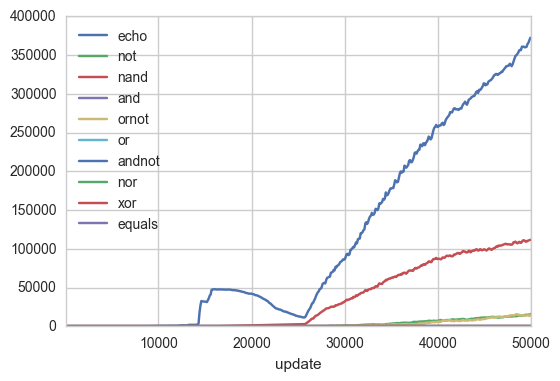

In [62]:
df_tasks_exe.plot('update', ['echo','not','nand','and','ornot','or','andnot','nor','xor','equals'])
#plt.xlim(20000,21000)

In [63]:
columns = ['update','nop-A','nop-B','nop-C','if-n-equ','if-less','if-label','mov-head',
           'jmp-head','get-head','set-flow','shift-r','shift-l','inc','dec',
           'push','pop','swap-stk','swap','add','sub','nand','h-copy',
           'h-alloc','h-divide','sense',#'sleep','sleep1','sleep2','sleep3','sleep4',
           'time','IO','h-search','']

df_inst = pd.read_table('../avida_files/clock/data/instruction.dat',
                           delimiter=' ', skiprows=37, header=None)

df_inst.columns = columns
df_inst = df_inst.dropna(axis=1)

df_inst.head()

,update,nop-A,nop-B,nop-C,if-n-equ,if-less,if-label,mov-head,jmp-head,get-head,...,add,sub,nand,h-copy,h-alloc,h-divide,sense,time,IO,h-search
0,500,0,0,170,0,0,200,200,0,0,...,0,0,0,200,2,2,0,0,0,4
1,600,0,0,170,0,0,200,200,0,0,...,0,0,0,200,2,2,0,0,0,4
2,700,0,0,170,0,0,200,200,0,0,...,0,0,0,200,2,2,0,0,0,4
3,800,0,0,340,0,0,400,400,0,0,...,0,0,0,400,4,4,0,0,0,8
4,900,0,0,340,0,0,400,400,0,0,...,0,0,0,400,4,4,0,0,0,8


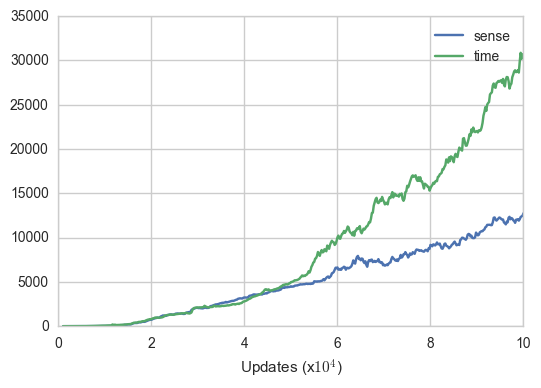

In [64]:
fig, ax = plt.subplots(1,1)

for i in df_inst.columns[-4:-2]:
    
    ax.plot(df_inst['update'], df_inst[i], label=i)

#ax.set_yscale('log', basey=10)

#ax.set_xlim(0,10000)
#ax.set_ylim(1,20e3)


ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^4$)')
#ax.set_ylabel('Computational Merit')

ax.legend(loc='best');

In [65]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

df_average = pd.read_table('../avida_files/clock/data/average.dat',
                           delimiter=' ', skiprows=19, header=None)

df_average.columns = columns
df_average = df_average.dropna(axis=1)

df_average.head()

,update,merit,gestation_time,fitness,repro_rate,(deprecated)_size,copied_size,executed_size,(deprecated)_abundance,proportion_of_organisms_that_gave_birth_in_this_update,proportion_of_breed_true_organisms,(deprecated)_genotype_depth,generation,neutral_metric,lineage_label,true_replication_rate_(based_on_births/update_time-averaged)
0,0,97.0,389.0,0.000000,0,0,100.0,97.0,0,1.0,1.0,0,0.0,0.0000,0,0.0
1,100,97.0,389.0,0.000000,0,0,100.0,97.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
2,200,97.0,389.0,0.000000,0,0,100.0,97.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
3,300,97.0,389.0,0.000000,0,0,100.0,97.0,0,0.0,0.0,0,0.0,0.0000,0,0.0
4,400,97.0,389.0,0.249357,0,0,100.0,97.0,0,0.0,0.0,0,1.0,-0.0567,0,0.0


In [66]:
columns = ['update','average_merit','average_gestation_time',
           'average fitness','repro_rate','size','copied_size',
           'executed_size','abundance','number_of_births',
           'number_of_dominant_breed','dominant_gene_depth',
           'dominant_breed_in','max_fitness','genotype_ID','name','']

df_dominant = pd.read_table('../avida_files/clock/data/dominant.dat',
                            delimiter=' ', skiprows=19, header=None)

df_dominant.columns = columns
df_dominant = df_dominant.dropna(axis=1)

df_dominant.head()

,update,average_merit,average_gestation_time,average fitness,repro_rate,size,copied_size,executed_size,abundance,number_of_births,number_of_dominant_breed,dominant_gene_depth,dominant_breed_in,max_fitness,genotype_ID,name
0,0,0.0,0.0,0.000000,0.000000,100,0.0,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
1,100,0.0,0.0,0.000000,0.000000,100,0.0,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
2,200,0.0,0.0,0.000000,0.000000,100,0.0,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
3,300,0.0,0.0,0.000000,0.000000,100,0.0,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
4,400,97.0,389.0,0.249357,0.002571,100,100.0,0,2,0,0,0,0,2.493570e-01,1,100-aaaaa


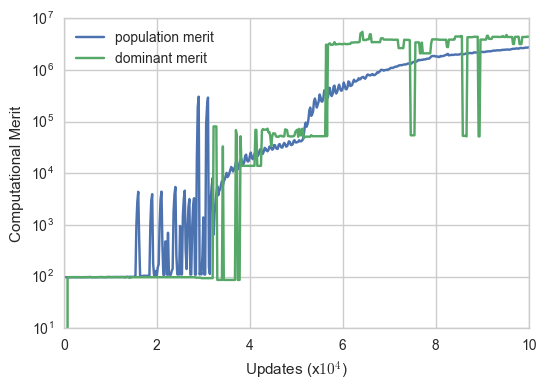

In [67]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['merit'], label='population merit')
ax.plot(df_average['update'], df_dominant['average_merit'], label='dominant merit')

ax.set_yscale('log', basey=10)

#ax.set_xlim(0,10000)
#ax.set_ylim(1,10e12)


ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^4$)')
ax.set_ylabel('Computational Merit')

ax.legend(loc='best');

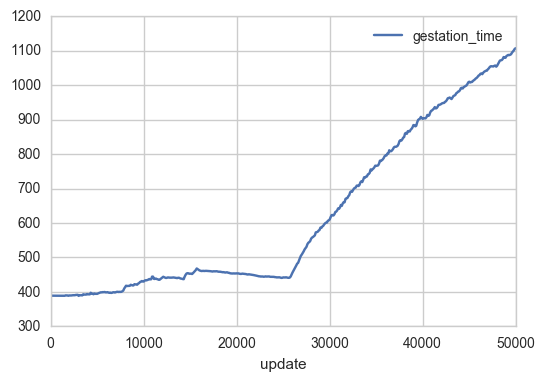

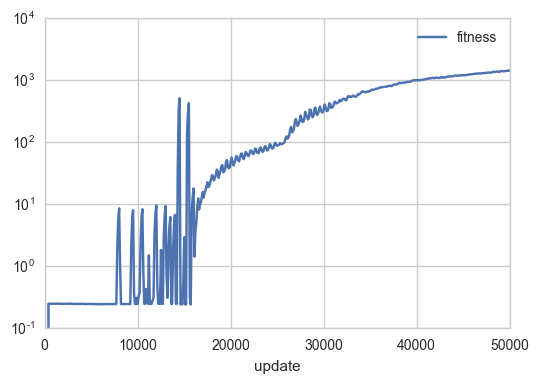

In [68]:
df_average.plot('update', 'gestation_time')
df_average.plot('update', 'fitness', logy=True)
#plt.xlim(100000,150000)

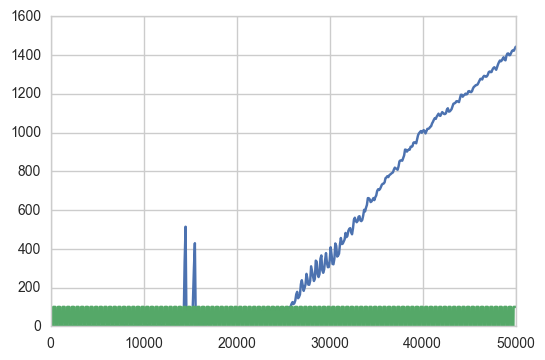

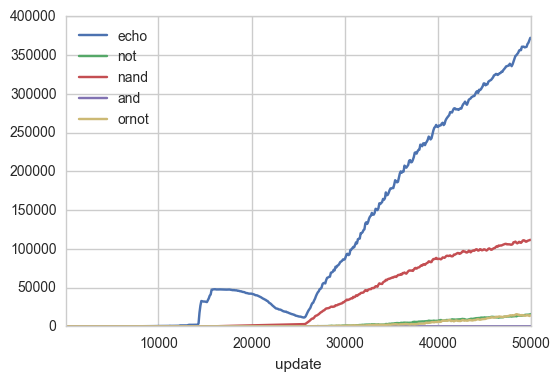

In [69]:
plt.plot(df_average['update'], df_average['fitness'])
plt.plot(df_res['update'], df_res['day'])
#plt.xlim(20000,40000)
df_tasks_exe.plot('update', ['echo','not','nand','and','ornot'])
#plt.xlim(6000,10000)
#plt.ylim(0,220)

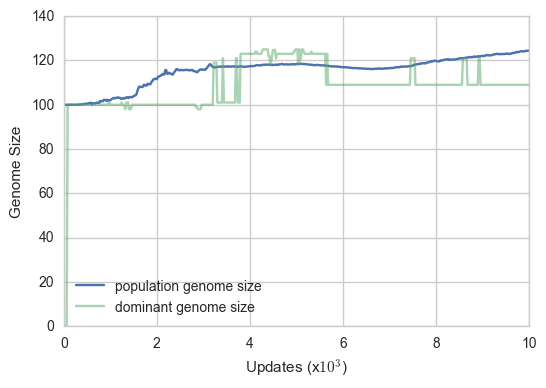

In [70]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['copied_size'], label='population genome size')
ax.plot(df_average['update'], df_dominant['copied_size'], label='dominant genome size', alpha=0.5)

ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^3$)')
ax.set_ylabel('Genome Size')

ax.legend(loc='best');

In [71]:
columns = ['update','echo','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_reac = pd.read_table('../avida_files/clock/data/reactions_exe.dat',
                        delimiter=' ', skiprows=16, header=None)

df_reac.columns = columns
df_reac = df_reac.dropna(axis=1)
df_reac.tail()

,update,echo,not,nand,and,ornot,or,andnot,nor,xor,equals
496,49600,181122,7371,54998,56,7039,0,2,0,0,0
497,49700,180987,7426,55433,56,7150,0,2,0,0,0
498,49800,181303,7374,55936,56,6731,0,2,0,0,0
499,49900,183062,7484,55945,116,7056,0,2,0,0,0
500,50000,185382,7698,55269,116,7023,0,2,0,0,0


(0, 100000)

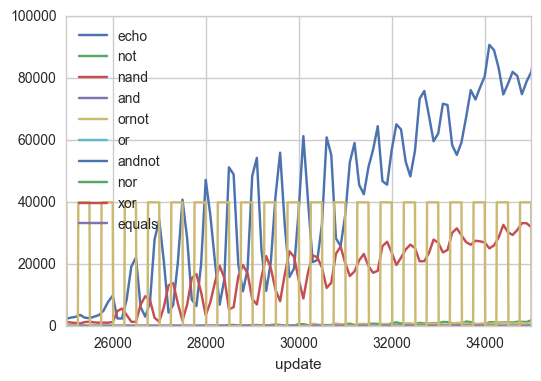

In [77]:
df_reac.plot('update', ['echo','not','nand','and','ornot','or','andnot','nor','xor','equals'])
plt.plot(df_res['update'], df_res['day']*400)
plt.xlim(25000,35000)
plt.ylim(0,100000)

## Complex Organisms

This data was generated to get an idea how a normal result looks like.

In [73]:
%%bash

head -19 ../avida_files/default//data/average.dat
head -19 ../avida_files/default/data/count.dat
head -19 ../avida_files/default/data/dominant.dat
head -7 ../avida_files/default/data/resource.dat
head -7 ../avida_files/default/data/time.dat
head -15 ../avida_files/default/data/tasks.dat

# Avida Average Data
# Tue Oct 18 13:18:33 2016
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: (deprecated) Size
#  7: Copied Size
#  8: Executed Size
#  9: (deprecated) Abundance
# 10: Proportion of organisms that gave birth in this update
# 11: Proportion of Breed True Organisms
# 12: (deprecated) Genotype Depth
# 13: Generation
# 14: Neutral Metric
# 15: Lineage Label
# 16: True Replication Rate (based on births/update, time-averaged)

# Avida count data
# Tue Oct 18 13:18:33 2016
#  1: update
#  2: number of insts executed this update
#  3: number of organisms
#  4: number of different genotypes
#  5: number of different threshold genotypes
#  6: (deprecated) number of different species
#  7: (deprecated) number of different threshold species
#  8: (deprecated) number of different lineages
#  9: number of births in this update
# 10: number of deaths in this update
# 11: number of breed true
# 12: number of breed true organisms?
# 13: number of n

In [19]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

df_average = pd.read_table('../avida_files/default/data/average.dat',
                           delimiter=' ', skiprows=19, header=None)

df_average.columns = columns
df_average = df_average.dropna(axis=1)

df_average.head()

,update,merit,gestation_time,fitness,repro_rate,(deprecated)_size,copied_size,executed_size,(deprecated)_abundance,proportion_of_organisms_that_gave_birth_in_this_update,proportion_of_breed_true_organisms,(deprecated)_genotype_depth,generation,neutral_metric,lineage_label,true_replication_rate_(based_on_births/update_time-averaged)
0,0,97.0000,389.000,0.000000,0,0,100.000,97.0000,0,1.000000,1.000000,0,0.00000,0.00000,0,0.0
1,100,97.0816,388.551,0.249858,0,0,100.041,97.0816,0,0.000000,0.000000,0,6.77551,2.09212,0,0.0
2,200,96.6243,390.340,0.247689,0,0,101.097,96.9282,0,0.019337,0.002762,0,14.83430,2.15712,0,0.0
3,300,96.6636,396.029,0.245592,0,0,102.568,98.1219,0,0.030212,0.014099,0,22.67880,2.09194,0,0.0
4,400,96.8318,391.400,0.247857,0,0,102.961,97.5155,0,0.043478,0.018334,0,30.44580,2.33022,0,0.0


In [20]:
columns = ['update','average_merit','average_gestation_time',
           'average fitness','repro_rate','size','copied_size',
           'executed_size','abundance','number_of_births',
           'number_of_dominant_breed','dominant_gene_depth',
           'dominant_breed_in','max_fitness','genotype_ID','name','']

df_dominant = pd.read_table('../avida_files/default/data/dominant.dat',
                            delimiter=' ', skiprows=19, header=None)

df_dominant.columns = columns
df_dominant = df_dominant.dropna(axis=1)

df_dominant.head()

,update,average_merit,average_gestation_time,average fitness,repro_rate,size,copied_size,executed_size,abundance,number_of_births,number_of_dominant_breed,dominant_gene_depth,dominant_breed_in,max_fitness,genotype_ID,name
0,0,0.0,0.0,0.000000,0.000000,100,0.0,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
1,100,97.0,389.0,0.249357,0.002571,100,100.0,0,15,0,0,0,0,2.493570e-01,1,100-aaaaa
2,200,97.0,389.0,0.249357,0.002571,100,100.0,0,7,0,0,2,0,2.493570e-01,121,100-aaaat
3,300,98.0,385.0,0.254545,0.002597,102,102.0,0,6,0,0,9,0,2.545450e-01,1406,102-aaaac
4,400,85.0,358.0,0.237430,0.002793,98,98.0,0,7,0,0,10,0,2.374300e-01,2316,098-aaaal


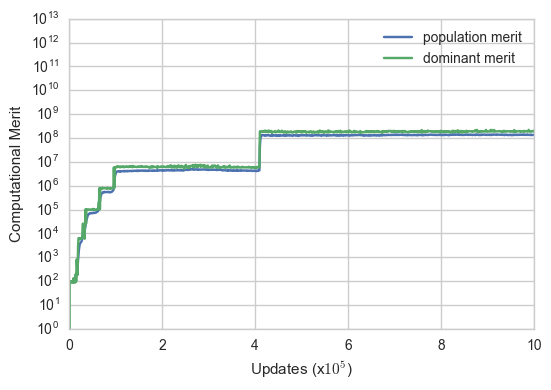

In [21]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['merit'], label='population merit')
ax.plot(df_average['update'], df_dominant['average_merit'], label='dominant merit')

ax.set_yscale('log', basey=10)

ax.set_xlim(0,100000)
ax.set_ylim(1,10e12)


ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^5$)')
ax.set_ylabel('Computational Merit')

ax.legend(loc='best');

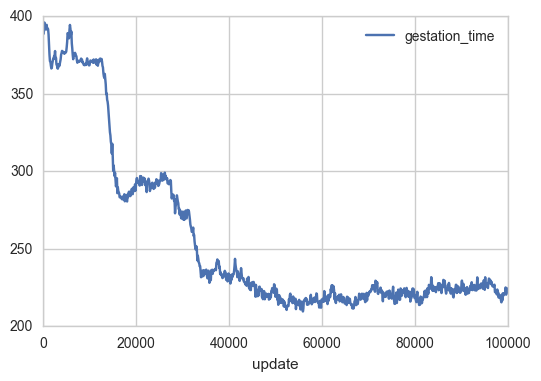

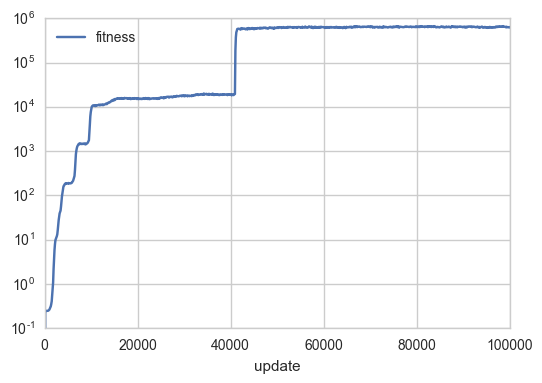

In [22]:
df_average.plot('update', 'gestation_time')
df_average.plot('update', 'fitness', logy=True)

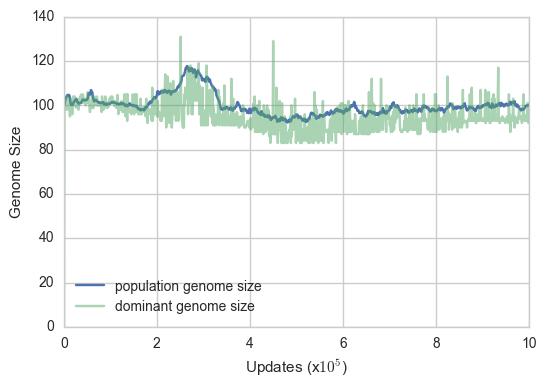

In [23]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['copied_size'], label='population genome size')
ax.plot(df_average['update'], df_dominant['copied_size'], label='dominant genome size', alpha=0.5)

ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^5$)')
ax.set_ylabel('Genome Size')

ax.legend(loc='best');

In [24]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_tasks = pd.read_table('../avida_files/default/data/tasks.dat',
                         delimiter=' ', skiprows=15, header=None)

df_tasks.columns = columns
df_tasks = df_tasks.dropna(axis=1)

df_tasks.tail()

,update,not,nand,and,ornot,or,andnot,nor,xor,equals
996,99600,3454,3373,3224,3364,3009,3243,3004,0,2708
997,99700,3418,3375,3253,3391,3012,3258,2970,0,2693
998,99800,3404,3362,3237,3396,2969,3288,2980,0,2669
999,99900,3435,3341,3215,3375,3009,3213,2987,0,2722
1000,100000,3450,3368,3240,3374,3018,3233,2982,0,2727


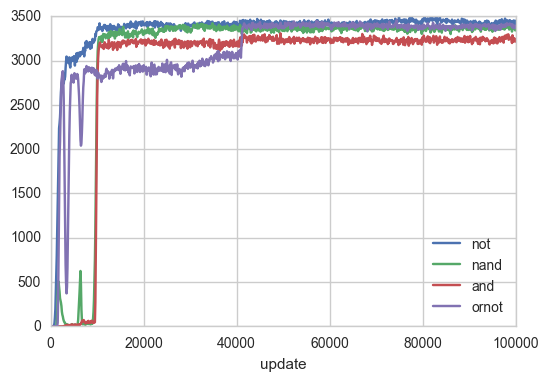

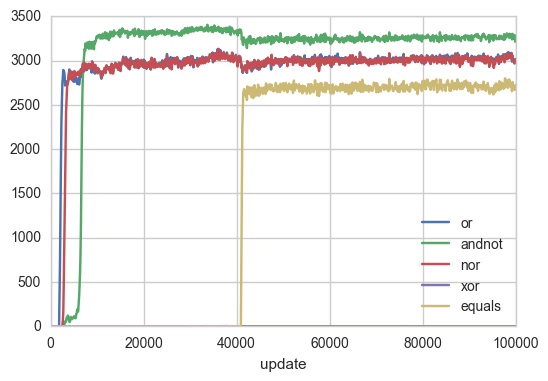

In [25]:
df_tasks.plot('update', ['not','nand','and','ornot'])
df_tasks.plot('update', ['or','andnot','nor','xor','equals'])